## Practica.

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

            ▪ Calcular e Identificar el aforo máximo permitido en la institución educativa.
            ▪ Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
            ▪ Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
            ▪ Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
            ▪ Realizar con un tiempo de un 1 mes.
         
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

**Nota**: No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.

In [2]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np

In [2]:
PROBABILIDAD_CONTAGIO=0.05
AFORO=300
TIEMPO_SIMULACION = 30*6*60

Ingreso a clases UPS
[17, 97, 85, 93, 95, 103, 105, 93, 94, 94, 90, 90, 95, 90, 83, 89, 90, 85, 87, 94, 93, 87, 101, 86, 103, 94, 80, 100, 102]
29
{311: 4, 280: 4, 272: 3, 99: 2, 95: 2, 297: 3, 64: 2, 229: 5, 317: 4, 237: 1, 245: 3, 239: 3, 276: 2, 261: 1, 121: 2, 254: 3, 133: 2, 284: 3, 359: 3, 344: 1, 145: 1, 77: 3, 274: 1, 278: 1, 209: 4, 124: 1, 212: 1, 75: 2, 303: 1, 160: 2, 353: 2, 329: 2, 248: 2, 263: 2, 277: 3, 182: 1, 119: 1, 348: 2, 218: 4, 319: 1, 199: 1, 185: 2, 169: 1, 67: 1, 335: 4, 156: 2, 81: 3, 324: 2, 208: 1, 137: 2, 188: 1, 136: 4, 128: 2, 165: 3, 117: 1, 61: 2, 122: 2, 351: 2, 195: 1, 85: 3, 314: 4, 220: 1, 264: 1, 307: 2, 253: 2, 231: 1, 357: 1, 321: 2, 236: 2, 249: 1, 74: 1, 338: 1, 358: 1, 219: 2, 112: 2, 98: 2, 91: 4, 84: 1, 286: 3, 325: 2, 232: 1, 110: 1, 340: 4, 349: 2, 94: 3, 305: 1, 251: 1, 242: 1, 252: 3, 139: 3, 72: 2, 153: 3, 171: 1, 115: 2, 200: 1, 138: 1, 214: 2, 180: 1, 211: 2, 116: 2, 127: 2, 339: 1, 258: 1, 257: 3, 191: 2, 354: 2, 281: 1, 320: 3, 316

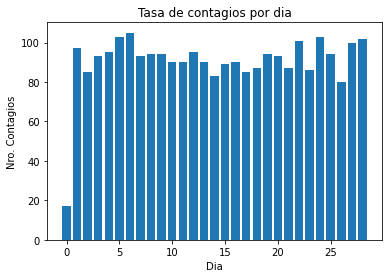

In [3]:

contador=0
contagios=[]
lasHoras={}

class Universidad(object):
    
    def __init__(self, environment, PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION):
        self.env=environment
        self.aforo = simpy.Resource(environment, AFORO)
        self.probabilidadContagio = PROBABILIDAD_CONTAGIO 
        
    def estanciaEnUniversidad(self, vehiculo):
        tiempo=random.randint(60,360)
        yield self.env.timeout(tiempo)
        return tiempo

def llegada_estudiantes(env, nombre, universidad):
    global contador
    # print('Llega %s: a la hora %.2f.' % (nombre, env.now))

    with universidad.aforo.request() as aforo:

        yield aforo

        # print('Entra %s a la hora %.2f.' % (nombre, env.now))
        tEst=yield env.process(universidad.estanciaEnUniversidad(nombre))
        # print(tEst)
        if tEst in lasHoras.keys():
            lasHoras[tEst]+=1
        else:
            lasHoras[tEst]=1

        # print('El %s salio a las %.2f.' % (nombre, env.now))
        # print(lasHoras)

def poner_contagios_porDia(lasHoras, PROBABILIDAD_CONTAGIO):
    contadorContagios=0
    for k in list(lasHoras.keys()):
        bernoulli = stats.bernoulli(PROBABILIDAD_CONTAGIO)
        contagios=bernoulli.rvs(lasHoras[k])
        # print(k)
        if k>=60 and k<120:
            bernoulli = stats.bernoulli(PROBABILIDAD_CONTAGIO)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=120 and k<180:
            a=PROBABILIDAD_CONTAGIO+0.1
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=180 and k<240:
            a=PROBABILIDAD_CONTAGIO+0.2
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=240 and k<300:
            a=PROBABILIDAD_CONTAGIO+0.3
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=300 and k<360:
            a=PROBABILIDAD_CONTAGIO+0.4
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        elif k>=360 and k<420:
            # print('hola')
            a=PROBABILIDAD_CONTAGIO+0.5
            bernoulli = stats.bernoulli(a)
            contagios=bernoulli.rvs(lasHoras[k])
        for c in contagios:
            if c == 1:
                contadorContagios+=1
    return contadorContagios

def ejecutar_simulacion(env,PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION):
    universidad=Universidad(env,PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION)
    global contador
    global lasHoras
    
    i=0
    while True:
        i+=1
        yield env.timeout(1)
        env.process(llegada_estudiantes(env, 'estudiante '+str(i), universidad))
        contagiosDia=poner_contagios_porDia(lasHoras, PROBABILIDAD_CONTAGIO)
        if i==360:
            contagios.append(contagiosDia)
            lasHoras={}
            i=0
        # contagios.append(contador)
        

print('Ingreso a clases UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, PROBABILIDAD_CONTAGIO, AFORO, TIEMPO_SIMULACION))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(contagios)
print(len(contagios))
print(lasHoras)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(list(range(len(contagios))))
valores = list(contagios)
plt.bar(etiqueta, valores, align="center")
plt.title("Tasa de contagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. Contagios")
plt.show()
